In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()

# 그래프 스타일 설정
# 그래프 스타일을 밑에서 설정하면 폰트가 깨진다
plt.style.use('dark_background')
# 폰트설정
plt.rc('font', family=font_family)
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)


df = pd.read_csv('eft_2021-09-04.csv', dtype={'종목코드': object})
df.head()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,41930,2,270,0.65,41979.0,-3.1976,2807005,117551,54593,국내 시장지수,KODEX,False,False,False
1,102110,1,TIGER 200,41960,2,270,0.65,42009.0,-3.1484,992124,41597,23225,국내 시장지수,TIGER,False,False,False
2,153130,6,KODEX 단기채권,102885,2,10,0.01,102883.0,0.0291,7598,781,20968,채권,KODEX,False,False,False
3,252670,3,KODEX 200선물인버스2X,2000,5,-25,-1.23,2004.0,5.2631,113442718,227795,20042,국내 파생,KODEX,True,False,False
4,371460,4,TIGER 차이나전기차SOLACTIVE,16480,5,-670,-3.91,NaN,26.3319,12395343,207101,18702,해외 주식,TIGER,False,False,False


In [2]:
# 업종: 제약
url = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261'

table = pd.read_html(url, encoding='cp949')
len(table)

3

In [3]:
raw = table[2]
print(raw.shape)
# 전체가 NaN일 때만,      컬럼
raw = raw.dropna(how='all').dropna(axis=1, how='all')
raw.shape

(152, 12)


(149, 9)

In [4]:
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,한국파마 *,78100.0,8600.0,+12.37%,78100.0,78200.0,3588899.0,279786.0,688406.0
2,삼아제약 *,23050.0,1550.0,+7.21%,23000.0,23050.0,226300.0,5151.0,219443.0
3,코스맥스엔비티 *,9210.0,580.0,+6.72%,9200.0,9210.0,191697.0,1733.0,127164.0
4,지엘팜텍 *,1455.0,85.0,+6.20%,1450.0,1455.0,6712248.0,9666.0,12967049.0
5,이수앱지스 *,16350.0,950.0,+6.17%,16350.0,16400.0,1619361.0,25924.0,492397.0


In [5]:
import datetime
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2021-09-11'

In [6]:
raw['조회일자'] = today
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,한국파마 *,78100.0,8600.0,+12.37%,78100.0,78200.0,3588899.0,279786.0,688406.0,2021-09-11
2,삼아제약 *,23050.0,1550.0,+7.21%,23000.0,23050.0,226300.0,5151.0,219443.0,2021-09-11
3,코스맥스엔비티 *,9210.0,580.0,+6.72%,9200.0,9210.0,191697.0,1733.0,127164.0,2021-09-11
4,지엘팜텍 *,1455.0,85.0,+6.20%,1450.0,1455.0,6712248.0,9666.0,12967049.0,2021-09-11
5,이수앱지스 *,16350.0,950.0,+6.17%,16350.0,16400.0,1619361.0,25924.0,492397.0,2021-09-11


In [7]:
temp = raw[['종목명', '거래량']].sort_values('거래량')
temp

,종목명,거래량
45,일양약품우,467.0
35,유유제약2우B,586.0
74,JW중외제약우,1024.0
44,일성신약,1135.0
10,JW중외제약2우B,1254.0
...,...,...
144,국전약품 *,3538279.0
1,한국파마 *,3588899.0
12,팜스빌 *,3772153.0
20,에이치엘비생명과학 *,5249129.0


<AxesSubplot:ylabel='종목명'>

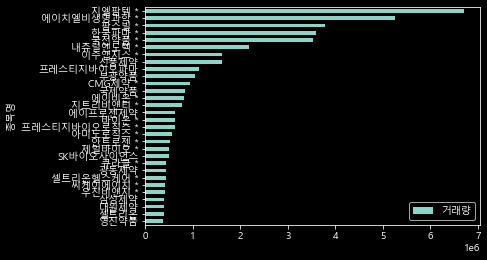

In [8]:
# 상위 30개 (오름차순 정렬이기 때문에 밑에서 30 == 상위 30)
temp.set_index('종목명').tail(30).plot.barh()

<AxesSubplot:ylabel='종목명'>

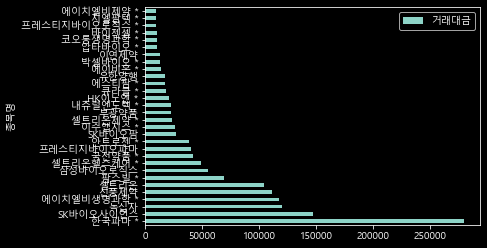

In [9]:
# ascending=False로 하면 가장 큰 값이 밑으로 간다
raw[['종목명', '거래대금']].set_index('종목명').sort_values('거래대금', ascending=False).head(30).plot.barh()

In [10]:
raw['종목명_전처리'] = raw['종목명'].str.replace('*', '')
raw['종목명_전처리'] = raw['종목명_전처리'].str.strip()

C:\Users\ysn65\AppData\Local\Temp/ipykernel_13468/867507199.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw['종목명_전처리'] = raw['종목명'].str.replace('*', '')


In [11]:
raw[['종목명', '종목명_전처리']].head()

,종목명,종목명_전처리
1,한국파마 *,한국파마
2,삼아제약 *,삼아제약
3,코스맥스엔비티 *,코스맥스엔비티
4,지엘팜텍 *,지엘팜텍
5,이수앱지스 *,이수앱지스


In [12]:
import FinanceDataReader as fdr
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [13]:
df_item_code_name = df_krx[['Symbol', 'Name']]
df_item_code_name.columns = ['종목코드', '종목명_전처리']
df_item_code_name.head()

,종목코드,종목명_전처리
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [14]:
df = raw.merge(df_item_code_name, on='종목명_전처리', how='left')
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,한국파마 *,78100.0,8600.0,+12.37%,78100.0,78200.0,3588899.0,279786.0,688406.0,2021-09-11,한국파마,032300
1,삼아제약 *,23050.0,1550.0,+7.21%,23000.0,23050.0,226300.0,5151.0,219443.0,2021-09-11,삼아제약,009300
2,코스맥스엔비티 *,9210.0,580.0,+6.72%,9200.0,9210.0,191697.0,1733.0,127164.0,2021-09-11,코스맥스엔비티,222040
3,지엘팜텍 *,1455.0,85.0,+6.20%,1450.0,1455.0,6712248.0,9666.0,12967049.0,2021-09-11,지엘팜텍,204840
4,이수앱지스 *,16350.0,950.0,+6.17%,16350.0,16400.0,1619361.0,25924.0,492397.0,2021-09-11,이수앱지스,086890
